In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
data=pd.read_csv("spam.csv")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.value_counts('Category')

Category
ham     4825
spam     747
dtype: int64

In [4]:
def change_lower(text):
    return text.lower() 

data['Message']=data['Message'].apply(change_lower)

In [5]:
data.Message.duplicated().sum()

416

In [6]:
data.Message.drop_duplicates()

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ü b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: Message, Length: 5156, dtype: object

<BarContainer object of 2 artists>

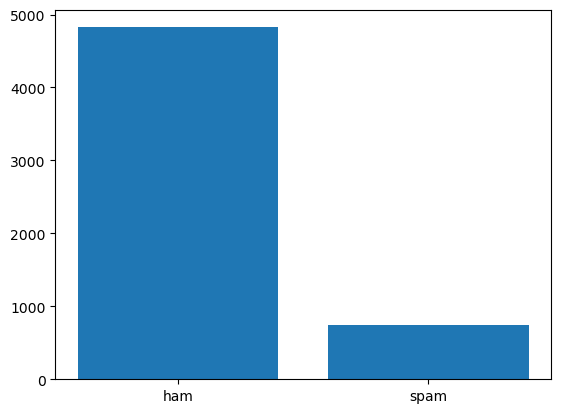

In [7]:
plt.bar(['ham','spam'],data['Category'].value_counts())

In [8]:
data['Category']=data['Category'].map({'ham':1,'spam':0})

In [9]:
x=data.Message
y=data.Category

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english') 
feature_extraction_train = feature_extraction.fit_transform(X_train)
feature_extraction_test  = feature_extraction.transform(X_test)

In [12]:
model=LogisticRegression()
model.fit(feature_extraction_train,y_train)

LogisticRegression()

In [13]:
y_pred=model.predict(feature_extraction_test)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.967713004484305
